In [59]:
from analysis.analysis import *
import matplotlib.pyplot as plt


root = "defaults"

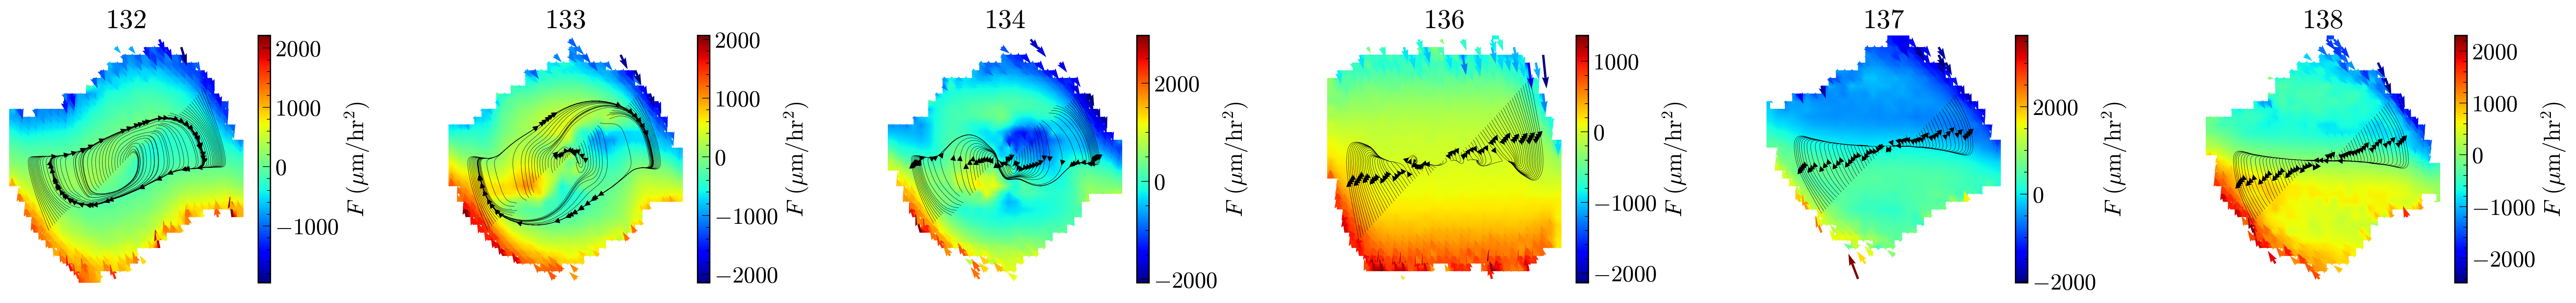

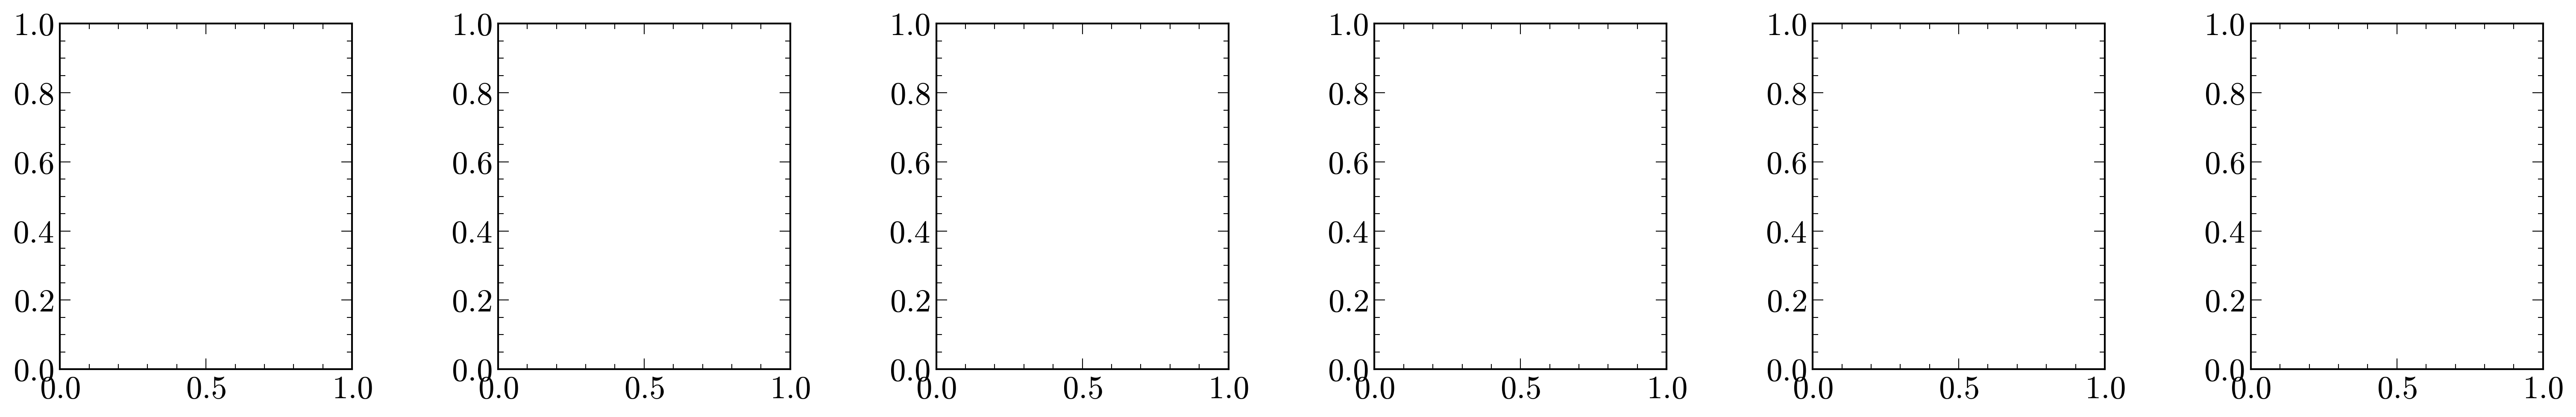

In [60]:
fig, ax = plt.subplots(1, 6, figsize=(35, 3.5), dpi=300)
fig_nl, ax_nl = plt.subplots(1, 6, figsize=(25, 3.5), dpi=300)

gids = [132, 133, 134, 136, 137, 138]

for k, gid in enumerate(gids):
    try:
        grid_df = read_fulltake(
            f"../_server/sim_data/{root}/parquets/fulltake_gid{gid}.parquet",
            scale_position=True,
        )
    except:
        ax[k].set_title(gid)
        continue

    grid_df = apply_time_filter(grid_df, dt=4)

    nbins = 32
    xva_df = get_xva_df(
        grid_df,
        nbins,
        yfile=f"../_server/sim_data/{root}/configs/grid_id{gid}/simbox.yaml",
    )

    bounds, F, sigma = compute_F_sigma(xva_df, nbins=nbins, min_pts=1)

    xmin, xmax = bounds["x"]
    vmin, vmax = bounds["v"]
    bounds_tup = (xmin, xmax, vmin, vmax, nbins)
    init_pts = linear_lattice(xmin, xmax, vmin, vmax, n_pts=100)

    ax[k].set_title(gid)
    F_streamplot(
        F,
        bounds_tup,
        stream_init_pts=init_pts,
        imshow_kwargs={"interpolation": "bilinear", "origin": "lower", "cmap": "jet"},
        streamplot_kwargs={
            "integration_direction": "forward",
            "color": "black",
            "broken_streamlines": False,
            "density": 1,
            "linewidth": 0.25,
        },
        do_try=True,
        ax=ax[k],
    )
    ax[k].set_axis_off()

    # lim = np.min([vmin, vmax])
    # v_interp = np.linspace(-lim, lim, 40)
    # X, Y, init_pts = full_lattice(F, xmin, xmax, vmin, vmax, nbins)
    # v, f = evaluate_F_v_x0(Y, F, nbins)
    # fs_interp = np.interp(v_interp, v, f)
    # ax_nl[k].plot(v_interp, fs_interp, "-o", c="black", lw=1)
    # ax_nl[k].set_xlabel(r"$v$ ($\mu$m/hr)")
    # ax_nl[k].set_ylabel(r"$F(x\rightarrow 0)$ ($\mu$m/hr$^2$)")

fig.subplots_adjust(wspace=0.5)
fig_nl.subplots_adjust(wspace=0.5)
plt.show()